In [38]:
import numpy
import sympy as sym
import matplotlib.pyplot as plt

def traza3natural(xi,yi):
    n = len(xi)
    
    # Valores h
    h = numpy.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    A = numpy.zeros(shape=(n-2,n-2), dtype = float)
    B = numpy.zeros(n-2, dtype = float)
    S = numpy.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)
        
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)
    
    # Resolver sistema de ecuaciones S
    r = numpy.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = numpy.zeros(n-1, dtype = float)
    b = numpy.zeros(n-1, dtype = float)
    c = numpy.zeros(n-1, dtype = float)
    d = numpy.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]
    
    # Polinomio trazador
    x = sym.Symbol("x")
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)
    
    return(px_tabla)

#Ejemplo

In [39]:

xi = numpy.array([0 , 1 , 2 , 3 , 4])
fi = numpy.array([1,0.9,-1,-2.3,1.8])
muestras = 10 # entre cada par de puntos

In [40]:



# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)

# SALIDA
print("Polinomios por tramos: ")
for tramo in range(1,n,1):
    print(" x = ["+str(xi[tramo-1])
          +","+str(xi[tramo])+"]")
    print(str(px_tabla[tramo-1]))

Polinomios por tramos: 
 x = [0,1]
-0.428571428571429*x**3 + 0.328571428571429*x + 1.0
 x = [1,2]
0.342857142857143*x**3 - 2.31428571428571*x**2 + 2.64285714285714*x + 0.228571428571429
 x = [2,3]
1.45714285714286*x**3 - 9.0*x**2 + 16.0142857142857*x - 8.68571428571429
 x = [3,4]
-1.37142857142857*x**3 + 16.4571428571429*x**2 - 60.3571428571428*x + 67.6857142857143


In [49]:
xn=0.5

print("f1(0,5)= ",(-0.428571428571429*xn**3 + 0.328571428571429*xn + 1.0))

print("f2(0,5)= ",(0.342857142857143*xn**3 - 2.31428571428571*xn**2 + 2.64285714285714*xn + 0.228571428571429))

print("f3(0,5)= ",(1.45714285714286*xn**3 - 9.0*xn**2 + 16.0142857142857*xn - 8.68571428571429))

print("f4(0,5)= ",(-1.37142857142857*xn**3 + 16.4571428571429*xn**2 - 60.3571428571428*xn + 67.6857142857143))


f1(0,5)=  1.1107142857142858
f2(0,5)=  1.0142857142857145
f3(0,5)=  -2.7464285714285843
f4(0,5)=  41.45000000000005


##Grafica

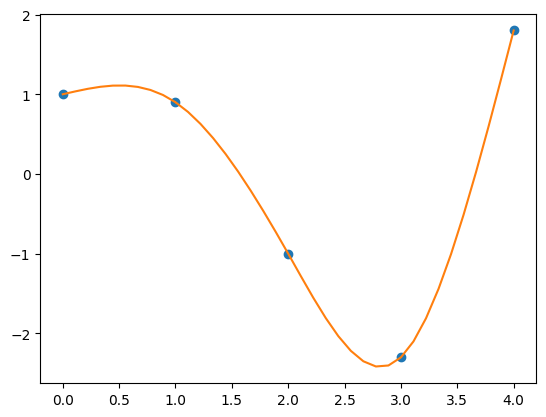

In [41]:
# GRAFICA
# Puntos para graficar cada tramo
xtraza = numpy.array([])
ytraza = numpy.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = numpy.linspace(a,b,muestras)
    
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify("x",pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = numpy.concatenate((xtraza,xtramo))
    ytraza = numpy.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,"o")
plt.plot(xtraza,ytraza)

plt.show()

#Taller

In [42]:
xi = numpy.array([0 , 1 , 2 , 3 , 4 , 5 , 6])
fi = numpy.array([3 , 5 , 6 , 5 , -2 , 2 , 13])
muestras = 10 # entre cada par de puntos

In [43]:
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)

# SALIDA
print("Polinomios por tramos: ")
for tramo in range(1,n,1):
    print(" x = ["+str(xi[tramo-1])
          +","+str(xi[tramo])+"]")
    print(str(px_tabla[tramo-1]))

Polinomios por tramos: 
 x = [0,1]
-0.287179487179487*x**3 + 2.28717948717949*x + 3.0
 x = [1,2]
0.435897435897436*x**3 - 2.16923076923077*x**2 + 4.45641025641026*x + 2.27692307692308
 x = [2,3]
-2.45641025641026*x**3 + 15.1846153846154*x**2 - 30.2512820512821*x + 25.4153846153846
 x = [3,4]
5.38974358974359*x**3 - 55.4307692307692*x**2 + 181.594871794872*x - 186.430769230769
 x = [4,5]
-2.1025641025641*x**3 + 34.4769230769231*x**2 - 178.035897435897*x + 293.076923076923
 x = [5,6]
-0.97948717948718*x**3 + 17.6307692307692*x**2 - 93.8051282051282*x + 152.692307692308


In [50]:
xn=3.25

print("f1(3,25)= ",(-0.287179487179487*xn**3 + 2.28717948717949*xn + 3.0))

print("f2(3,25)= ",(0.435897435897436*xn**3 - 2.16923076923077*xn**2 + 4.45641025641026*xn + 2.27692307692308))

print("f3(3,25)= ",(-2.45641025641026*xn**3 + 15.1846153846154*xn**2 - 30.2512820512821*xn + 25.4153846153846))

print("f4(3,25)= ",(5.38974358974359*xn**3 - 55.4307692307692*xn**2 + 181.594871794872*xn - 186.430769230769))

print("f5(3,25)= ",(-2.1025641025641*xn**3 + 34.4769230769231*xn**2 - 178.035897435897*xn + 293.076923076923))

print("f6(3,25)= ",(-0.97948717948718*xn**3 + 17.6307692307692*xn**2 - 93.8051282051282*xn + 152.692307692308))

f1(3,25)=  0.5750000000000162
f2(3,25)=  8.811298076923087
f3(3,25)=  3.1622596153844746
f4(3,25)=  3.284855769232081
f5(3,25)=  6.445673076924777
f6(3,25)=  0.42668269230765077


##Grafica

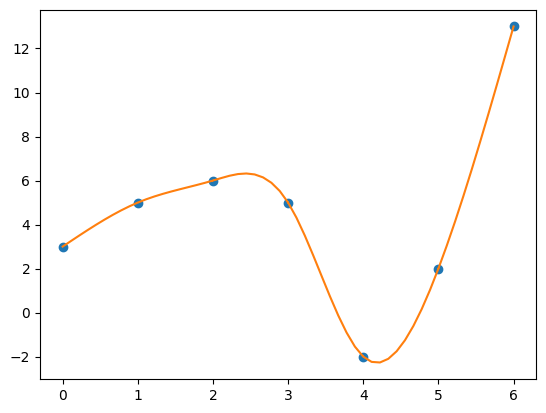

In [44]:
# GRAFICA
# Puntos para graficar cada tramo
xtraza = numpy.array([])
ytraza = numpy.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = numpy.linspace(a,b,muestras)
    
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify("x",pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = numpy.concatenate((xtraza,xtramo))
    ytraza = numpy.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,"o")
plt.plot(xtraza,ytraza)

plt.show()